### Pandas를 이용한 시각화
- matplot를 이용한 시각화 : 한땀 한땀 직접 그려볼 수 있다. = 커스터마이징 용이
- seaborn, pandas를 이용한 시각화 : 손쉽게 차트를 그릴 수 있다
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
- 

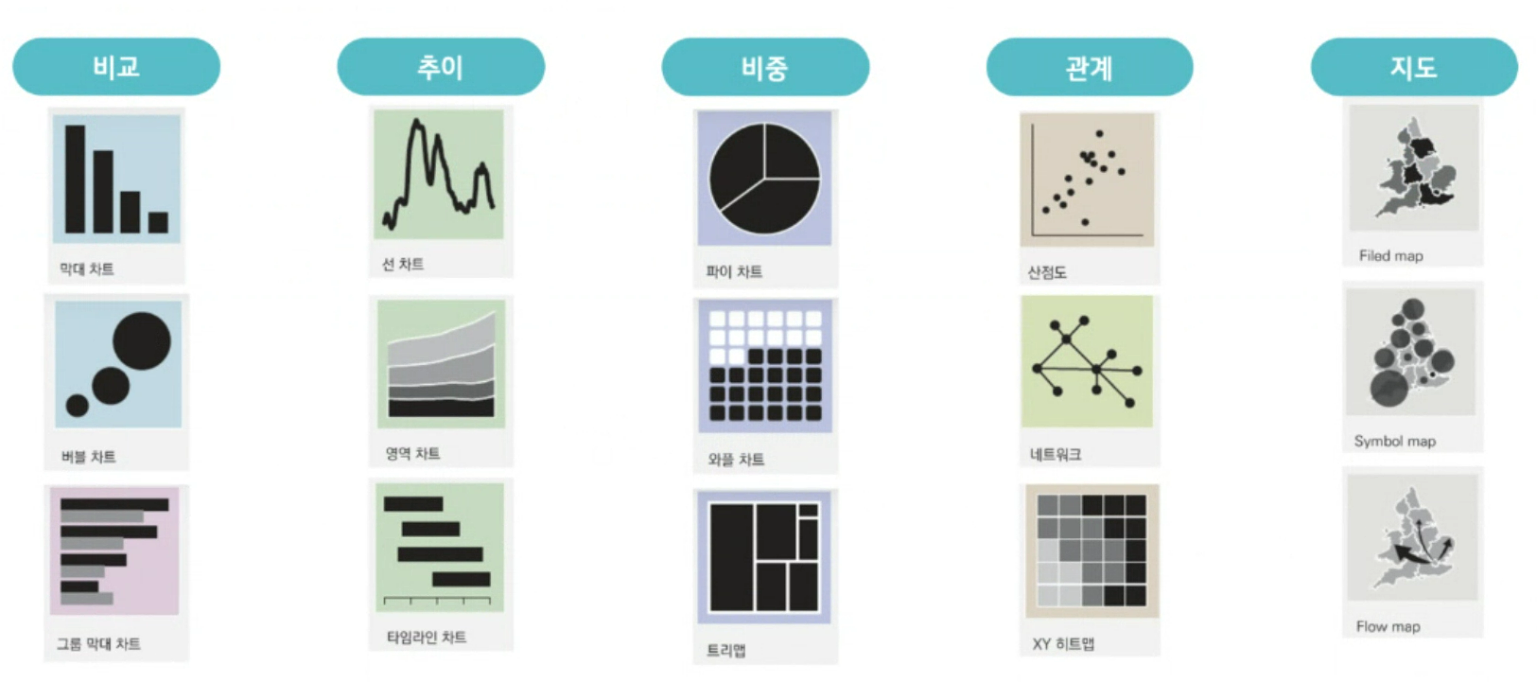

In [1]:
import pandas as pd

1. line chart

### 연도별 입사자 추세 그래프

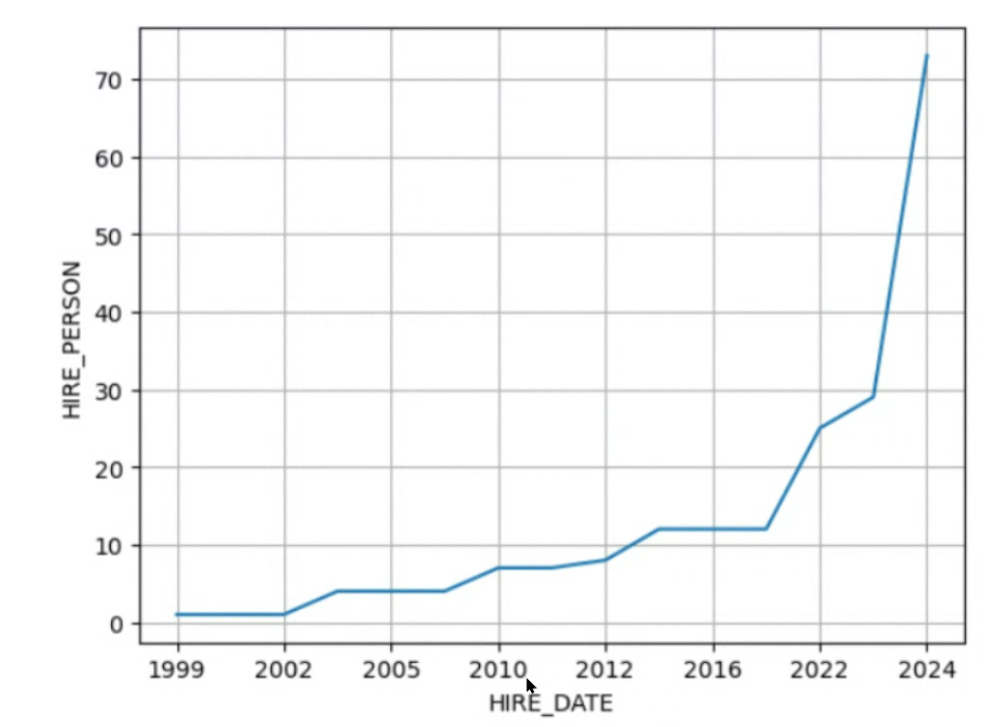

In [9]:
#  HR 데이터 로딩
hr_info = pd.read_csv("./data/hr-info.csv", encoding = "euc-kr", parse_dates=["HIRE_DATE"])
hr_info.head(5)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [10]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

In [11]:
# 입사연도 추출하기
hr_info["HIRE_DATE"].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [14]:
# 새로운 컬럼 추가
hr_info["hire_year"] = hr_info["HIRE_DATE"].dt.year
hr_info.head(5)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,hire_year
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005


In [15]:
hr_info['hire_year'].value_counts() # 값을 세어주는 함수는 valuecount 뒤에 () 꼭 붙이기!!

hire_year
2024    73
2023    29
2022    25
2017    12
2016    12
2015    12
2012     8
2011     7
2010     7
2006     4
2005     4
2004     4
1999     1
2000     1
2002     1
Name: count, dtype: int64

<Axes: xlabel='HIRE_DATE', ylabel='HIRE_PERSON'>

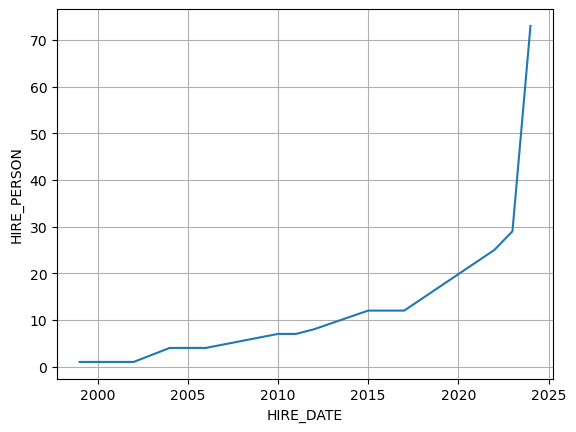

In [19]:
# 연도별로 입사자 수 파악하기
hr_info['hire_year'].value_counts().sort_index().plot(kind = "line",
                                                     xlabel = "HIRE_DATE",
                                                     ylabel = "HIRE_PERSON",
                                                     grid = True)

2. bar chart

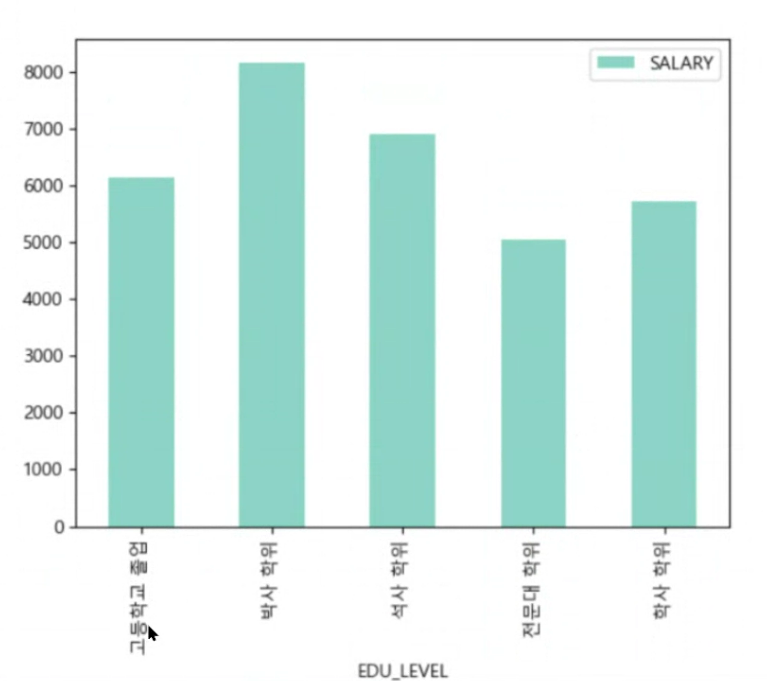

### 학위별 평균 연봉 비교해보기

In [20]:
# 한글 폰트 적용
import matplotlib.pyplot as plt
plt.rc("font",family = "Malgun Gothic")

<Axes: xlabel='EDU_LEVEL'>

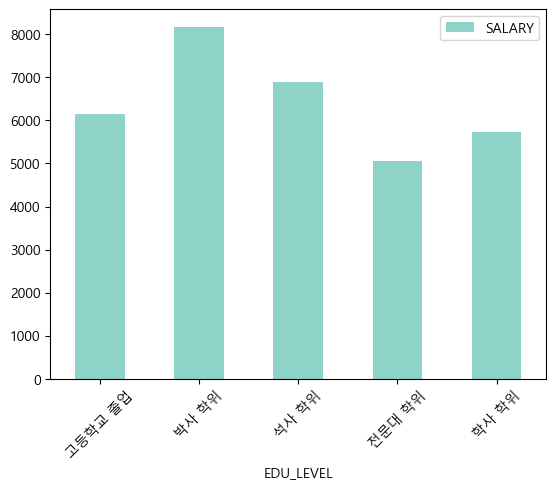

In [31]:
# 데이터 집계 및 시각화 # 대괄호 2번 써야 df 형태로 가져올 수 있음.
hr_info[['EDU_LEVEL','SALARY']].groupby(by="EDU_LEVEL").mean().plot(kind="bar", colormap = "Set3",rot = 45)

### 학위, 성별을 고려한 평균 연봉 시각화

<Axes: xlabel='EDU_LEVEL,GENDER'>

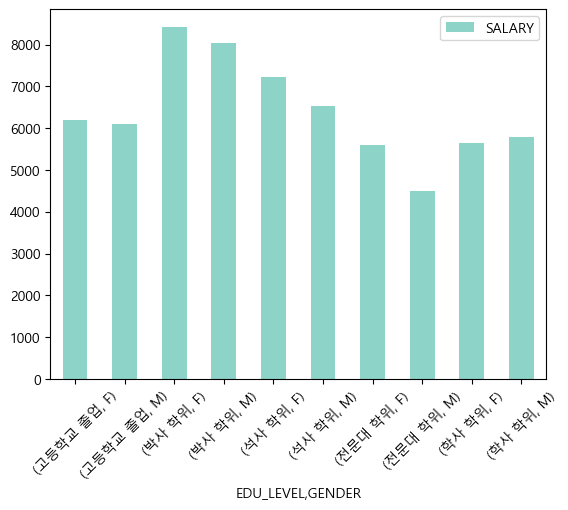

In [36]:
hr_info[['EDU_LEVEL','SALARY','GENDER']].groupby(by=["EDU_LEVEL","GENDER"]).mean().plot(kind="bar", colormap = "Set3",rot = 45)
                                                # BY 뒤에 1개로만 묶을 수 있으니 리스트로 묶어버린다.

In [43]:
salary_mean = hr_info[['EDU_LEVEL','SALARY','GENDER']].groupby(by=["EDU_LEVEL","GENDER"]).mean().round(1)

# 데이터 재구조화
salary_mean2 = salary_mean.reset_index().pivot(index = "EDU_LEVEL", columns = "GENDER", values = "SALARY")
salary_mean2

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.0,6100.0
박사 학위,8425.0,8037.5
석사 학위,7233.3,6525.0
전문대 학위,5600.0,4500.0
학사 학위,5643.1,5785.1


<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

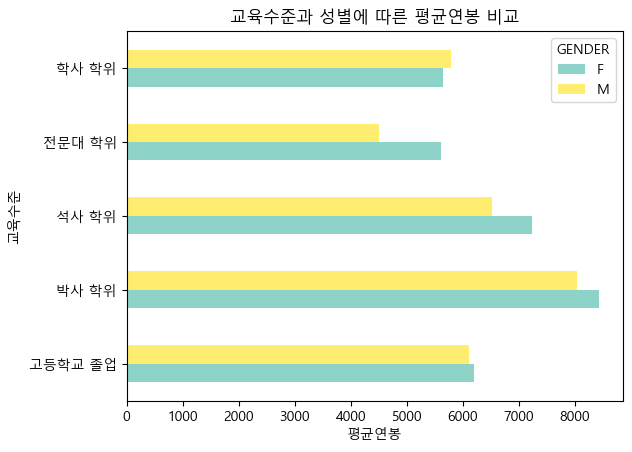

In [47]:
salary_mean2.plot(kind="barh", colormap="Set3", xlabel = "평균연봉", ylabel="교육수준", title="교육수준과 성별에 따른 평균연봉 비교")

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

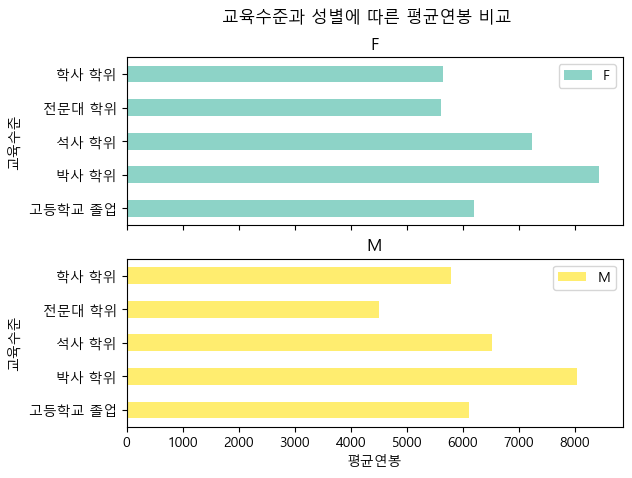

In [48]:
salary_mean2.plot(kind="barh", colormap="Set3", xlabel = "평균연봉", ylabel="교육수준", title="교육수준과 성별에 따른 평균연봉 비교", subplots=True)


### [실습] 부서별 평균 연봉 비교하기
- figsize : 그림의 크기를 조절하는 속성 -> figsize=(10,5) -> 가로, 세로 inch 단위
- ylim : y축의 limit 설정 -> ylim = (4000, 7000) -> 축의 최소, 최대값 설정

In [49]:
# 조직 정보 로딩
org_info = pd.read_csv("./data/org-info.csv", encoding = "euc-kr")
org_info.head(5)

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [51]:
# 조직정보와 구성원 정보를 merge
# ORG_CD를 중심으로 병합
org_hr_merge = pd.merge(hr_info, org_info, on = "ORG_CD")
org_hr_merge

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,hire_year,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,KOREA,Y,2006,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
1,E00372,난봉랑,M,ORG007,P005,38,14,학사 학위,1.35,7400,...,China,Y,2010,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
2,E00423,강회나,F,ORG007,P006,36,9,박사 학위,3.97,7100,...,Japan,Y,2015,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
3,E00185,주인철,F,ORG007,P006,37,7,학사 학위,2.82,6700,...,KOREA,Y,2015,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
4,E00307,도단강,M,ORG007,P006,39,7,학사 학위,4.28,6700,...,Japan,Y,2017,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,E00367,달니대,F,ORG001,P008,29,0,학사 학위,0.00,5000,...,KOREA,N,2024,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
193,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,...,KOREA,N,2024,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
194,E00171,표화선,F,ORG015,P008,24,0,학사 학위,0.00,5000,...,KOREA,Y,2024,Home Appliance and Air Solution Division,HA사업본부,Kitchen Solutions Department,키친솔루션사업부,Kitchen Customer Service Team,주방 고객 서비스 팀,주방 가전 제품에 대한 고객 지원 및 서비스 제공을 담당합니다.
195,E00204,처온주,M,ORG015,P008,25,0,학사 학위,0.00,5000,...,KOREA,Y,2024,Home Appliance and Air Solution Division,HA사업본부,Kitchen Solutions Department,키친솔루션사업부,Kitchen Customer Service Team,주방 고객 서비스 팀,주방 가전 제품에 대한 고객 지원 및 서비스 제공을 담당합니다.


In [52]:
org_hr_merge.shape
# CEO, 사장, 부사장은 조직정보가 없어서 제외됨.

(197, 28)

In [55]:
# 부서별 평균 연봉 구하기
team_salary_mean = org_hr_merge[["SALARY","KOR_TEAM"]].groupby(by="KOR_TEAM").mean()
team_salary_mean

,SALARY
KOR_TEAM,
TV 고객 지원 팀,6480.000000
TV 마케팅 팀,6550.000000
TV 제품 관리 팀,5033.333333
webOS 사용자 인터페이스 팀,5525.000000
webOS 품질 보증 팀,5966.666667
webOS 핵심 개발 팀,6445.454545
고객 통찰 팀,5520.000000
글로벌 판매 전략 팀,6728.571429
기술 영업 지원 팀,5680.000000


<Axes: xlabel='KOR_TEAM'>

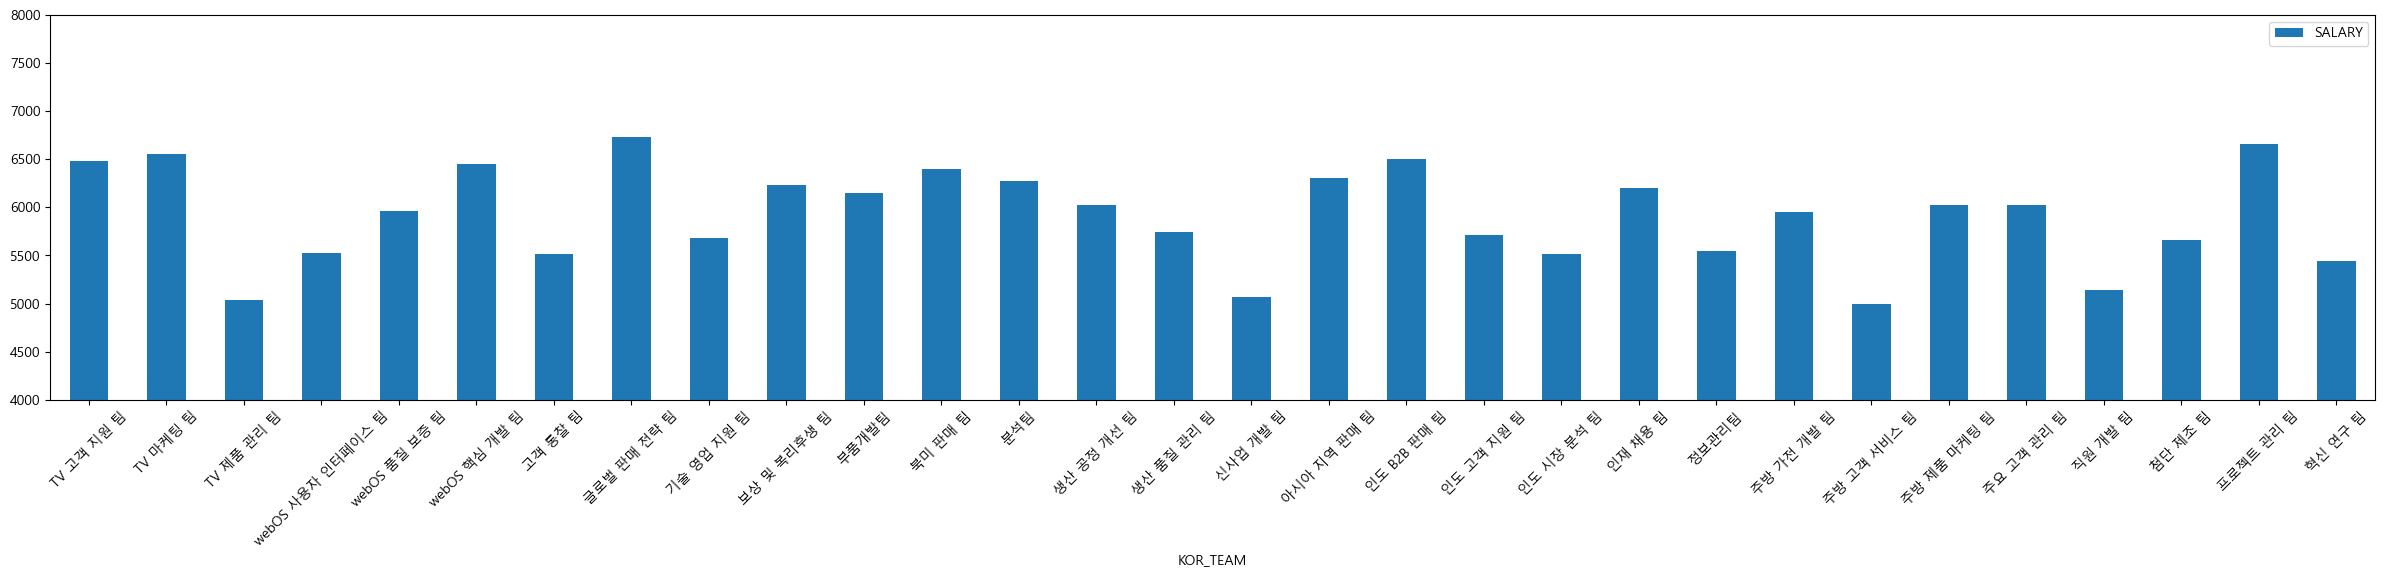

In [65]:
# 데이터 시각화 figsize = (30,5)
team_salary_mean.plot(kind = "bar", figsize=(30,5),ylim=(4000,8000), rot=45)


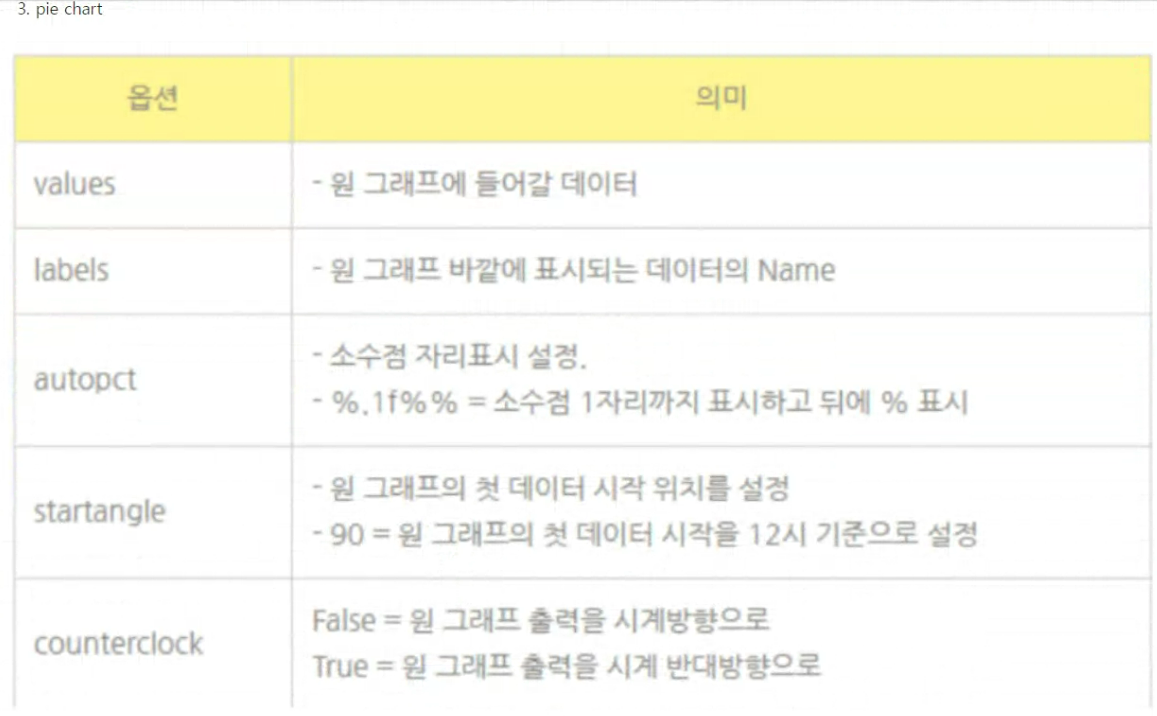

### 각 부서별 인원 수 확인

<Axes: title={'center': '각 본부의 인원비율'}>

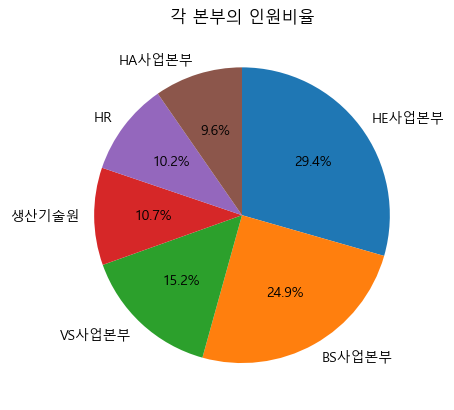

In [72]:
org_hr_merge["KOR_DIVISION"].value_counts().plot(kind="pie", startangle = 90, counterclock=False, autopct="%.1f%%", ylabel="", title="각 본부의 인원비율")
# ylabel 없애려면 ylabel=""

4. scatter(산점도)

나이에 따른 연봉 변화

<Axes: xlabel='AGE', ylabel='SALARY'>

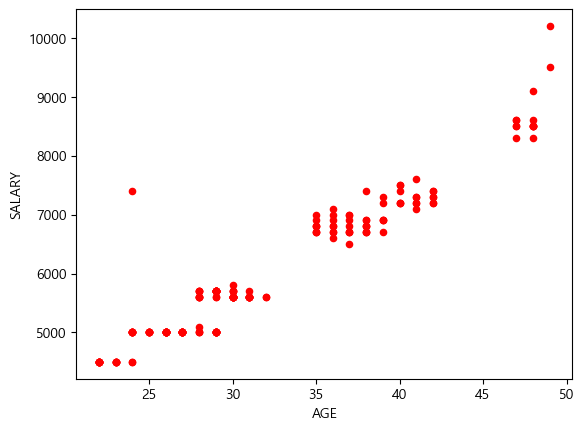

In [73]:
hr_info.plot(kind="scatter", x="AGE",y="SALARY", color="red")

### Seaborn을 이용한 차트
- matplotlib을 기반으로 데이터 시각화 도구
- 화려하고 다양한 형태의 그래프를 손쉽게 사용할 수 있음.
- 사용하기 편하다

1. 히스토그램
   - 성별에 따른 연봉 프로그램

In [74]:
import seaborn as sns

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SALARY', ylabel='Count'>

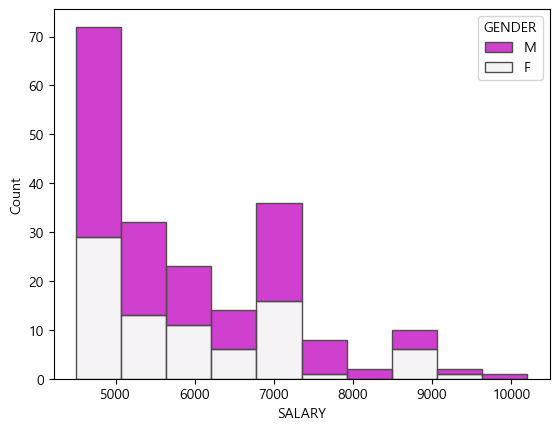

In [81]:
sns.histplot(
    hr_info, # 사용할 데이터
    x = "SALARY", hue="GENDER",
    multiple = "stack",
    palette = "light:m_r",
    edgecolor = ".3"
    linewidth = .9
)

2. 버블차트

### 나이와 근속연수에 따른 부서별 연봉비교

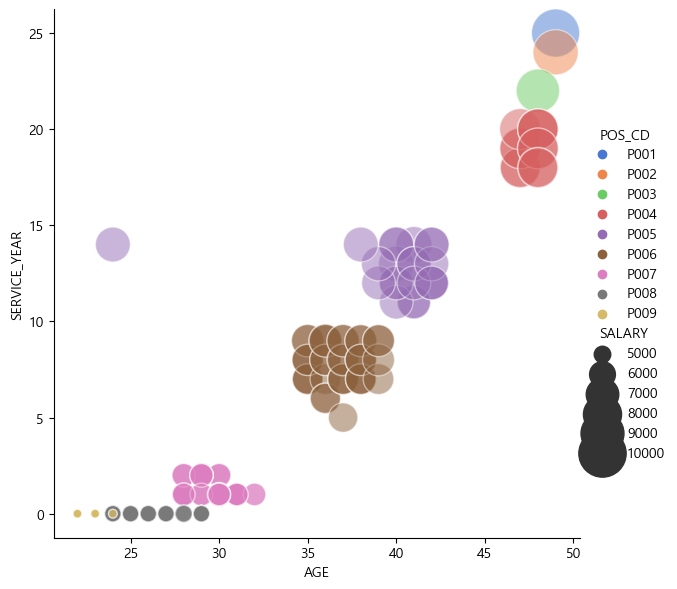

In [83]:
sns.relplot(x = "AGE",y="SERVICE_YEAR", hue = "POS_CD", size = "SALARY",
            sizes = (40, 1200), alpha = .5, palette = "muted",
            height = 6, data = hr_info 
           )

3. 히트맵
   - 상관계수 시각화

In [87]:
hr_corr = hr_info[["PERFORMANCE_SCORE","SALARY","AGE","SERVICE_YEAR","TRAINING_HOURS"]].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


<Axes: >

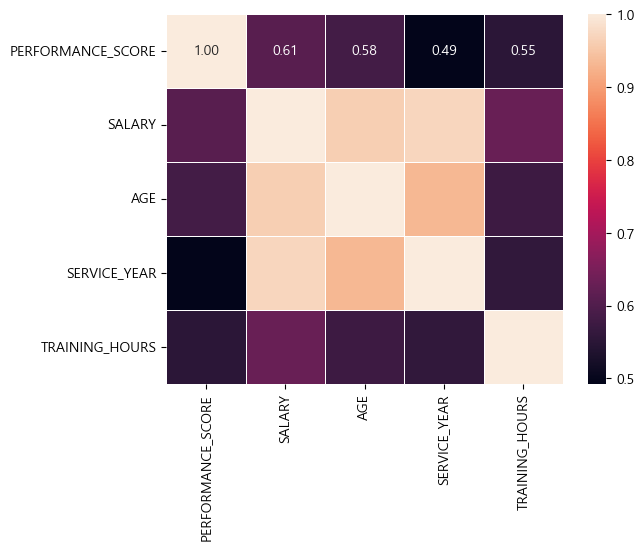

In [88]:
sns.heatmap(hr_corr, annot = True, fmt = ".2f",linewidth=.5)#.2f 소수점 둘째자리까지)

In [89]:
!pip list 

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [92]:
# 버전 변경
!pip install seaborn==0.13.0

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
